In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

diabetesdf = pd.read_csv('combined_dataset.csv', na_filter = False)

#since we only need the 3rd column(Code), we will remove the Date and Time columns
diabetesdf.drop(diabetesdf.columns[[0,1]], axis = 1, inplace=True)
diabetesdf.to_csv('diabetesdf.csv', index=False)
diabetesdf

,Code,Value
0,58,100
1,33,9
2,34,13
3,62,119
4,33,7
...,...,...
29325,33,1
29326,34,7
29327,34,7
29328,34,7


In [46]:
x = diabetesdf['Code']
y = diabetesdf['Value']
print(x)
print(y)

0        58
1        33
2        34
3        62
4        33
         ..
29325    33
29326    34
29327    34
29328    34
29329    34
Name: Code, Length: 29330, dtype: int64
0        100
1          9
2         13
3        119
4          7
        ... 
29325      1
29326      7
29327      7
29328      7
29329      7
Name: Value, Length: 29330, dtype: object


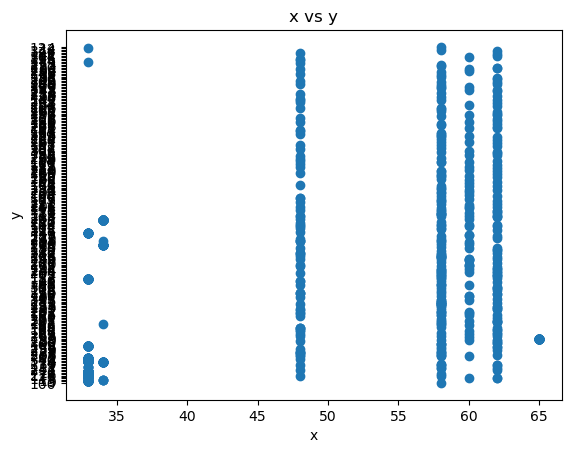

In [47]:
#this is a scatterplot to show the relationship between x and y
plt.scatter(x.head(1000),y.head(1000))
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

#get folder and file path
folder_path = r'C:\\Users\\shrey\\CSC 4850 - Machine Learning\\Homework 1 - KNN and K-Means'

#load the 70 data files
patients_data = []
max_length = 0

for i in range(1, 71):
    filename = f'{folder_path}\\data-{i:02d}' 
    with open(filename, 'r') as file:
        patient_sequence = file.read().strip()
        patients_data.append(patient_sequence)
        max_length = max(max_length, len(patient_sequence))

#define ngram range. The min and max values can be adjusted
ngram_range = (2, 4) 

#initialize countvectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)

#this will convert each of the pateients sequences to ngrams
ngram_data = vectorizer.fit_transform(patients_data)

#this will turn the matrix above into a concise array
final_data_matrix = ngram_data.toarray()

print(final_data_matrix)

[[664   0   0 ...   0   0   0]
 [624   0   0 ...   1   1   1]
 [145  17  17 ...   0   0   0]
 ...
 [623   0   0 ...   0   0   0]
 [ 14   0   0 ...   0   0   0]
 [397   0   0 ...   0   0   0]]


In [134]:
#this is to turn the ngrams version into a dataframe
final_dataframe = pd.DataFrame(final_data_matrix)

#this is to rename 0 column of dataframe from arrays into 'Value'
final_dataframe = final_dataframe.rename(columns={0: 'Value'})

final_dataframe

,Value,1,2,3,4,5,6,7,8,9,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
0,664,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,624,0,0,0,0,0,0,0,0,0,...,6,1,4,1,1,1,1,1,1,1
2,145,17,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127,8,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,249,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,639,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,623,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.model_selection import train_test_split

#this splits the training-validation-test sets into a 60-10-30% split
train_data, temp_data = train_test_split(final_dataframe, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.75, random_state=42)

#this splits the features
X_train = train_data.drop('Value', axis=1)
X_valid = valid_data.drop('Value', axis=1)
X_test = test_data.drop('Value', axis=1)

#this splits the Value variable since it is the target
y_train = train_data['Value']
y_valid = valid_data['Value']
y_test = test_data['Value']

#prints out shape of sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (42, 5294) (42,)
Validation set shape: (7, 5294) (7,)
Test set shape: (21, 5294) (21,)


In [136]:
#dataframe for training set
train_data

,Value,1,2,3,4,5,6,7,8,9,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
46,123,10,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1080,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,44,11,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,113,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
25,464,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,210,73,73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,126,27,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127,8,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,116,22,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
valid_data

,Value,1,2,3,4,5,6,7,8,9,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
44,99,5,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,107,27,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,112,39,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,71,37,37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,112,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,118,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,168,59,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
test_data

,Value,1,2,3,4,5,6,7,8,9,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
12,171,65,59,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,592,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,104,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,122,39,22,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,124,9,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,623,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,109,37,37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,100,9,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
from tqdm import tqdm

def sigmoid_formula(instance):
    sigmoid_denominator = 1 + np.exp(-instance)
    return 1 / sigmoid_denominator

def log_regress(instance, output, iterations, learning_rate=0.00001):
    #initialize weights with zeros
    m = np.zeros(X_train.shape[1])
    b = 0

    gradients_m = []  #list to store gradient values after each iteration
    gradients_b = []

    progress_bar = tqdm(total=iterations, desc="Training Progress")

    for _ in range(iterations):
        predictions = sigmoid_formula(np.dot(instance, m) + b)
        error = predictions - output
        dm = (1/len(instance)) * np.dot(instance.T, error)
        db = (1/len(instance)) * np.sum(error)

        m -= learning_rate * dm
        b -= learning_rate * db

        gradients_m.append(dm)
        gradients_b.append(db)

        progress_bar.update(1)  #update progress bar
        progress_bar.set_postfix({'m': f'{m}', 'b': f'{b}'})

    progress_bar.close()
    return m, b, gradients_m, gradients_b



def predictor_function(instance, m, b):
    return (m * instance) + b
numeric_mask = pd.to_numeric(y_train, errors='coerce').notna()
X_train = X_train[numeric_mask]
y_train = y_train[numeric_mask]

#convert y_train to a numeric type
y_train = y_train.astype(float)


m, b, gm, gb = log_regress(X_train, y_train, 50)
print('m is:', m)
print('b is:', b)

Training Progress: 100%|██████████| 50/50 [00:00<00:00, 204.03it/s, m=[0.92729952 0.92729952 0.         ... 0.00741679 0.00741679 0.00741679], b=0.14433833333333332] 


m is: [0.92729952 0.92729952 0.         ... 0.00741679 0.00741679 0.00741679]
b is: 0.14433833333333332


In [140]:
newvalidation_predictions = predictor_function(X_valid, m, b)
newvalidation_predictions

,1,2,3,4,5,6,7,8,9,10,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
44,4.780836,2.926237,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
16,25.181425,25.181425,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
33,36.309020,36.309020,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
31,34.454421,34.454421,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
62,6.635435,6.635435,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,50.147892,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
47,6.635435,6.635435,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,75.149668,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
10,54.855010,54.855010,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,75.149668,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338


In [141]:
#assuming newvalidation_predictions is your DataFrame
threshold = 1e-6  #you can adjust this threshold based on your data precision

newvalidation_predictions = newvalidation_predictions.applymap(lambda x: np.nan if abs(x - 0.144338) < threshold else x)
newvalidation_predictions

,1,2,3,4,5,6,7,8,9,10,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
44,4.780836,2.926237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,25.181425,25.181425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,36.309020,36.309020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,34.454421,34.454421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,6.635435,6.635435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.147892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,6.635435,6.635435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.149668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,54.855010,54.855010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.149668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
#assuming new_df is your DataFrame with NaN values
#new_df
stacked_df = newvalidation_predictions.stack()

#create a new DataFrame with one column and drop NaN values
validfinal_df = pd.DataFrame({'Combined_Column': stacked_df.dropna().values})
validfinal_df

,Combined_Column
0,4.780836
1,2.926237
2,7.733050
3,1.805562
4,4.332620
...,...
11500,0.975650
11501,0.906681
11502,0.906681
11503,3.118631


In [143]:
validfinal_array = validfinal_df.values
validfinal_array

array([[4.78083595],
       [2.9262369 ],
       [7.73305024],
       ...,
       [0.90668119],
       [3.11863119],
       [3.11863119]])

In [144]:
y_testarray = y_test.values
y_testarray

array([ 171,  592,  104,  122,  124,  623,  109,  100,  194,  153,  638,
        664, 1158,  122,  117,  126,  750,  120,  440,   84,  131],
      dtype=int64)

In [145]:
#applying sigmoid function
validprobabilities = 1 / (1 + np.exp(-validfinal_array))

print(validprobabilities)

[[0.99168081]
 [0.94912829]
 [0.99956209]
 ...
 [0.71232055]
 [0.95765475]
 [0.95765475]]


In [146]:
#applying sigmoid function
y_probabilities = 1 / (1 + np.exp(-y_testarray))

print(y_probabilities)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [147]:
print("Actual vs Predicted:")
for actual, predicted in zip(y_testarray, validfinal_array):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted:
Actual: 171, Predicted: [4.78083595]
Actual: 592, Predicted: [2.9262369]
Actual: 104, Predicted: [7.73305024]
Actual: 122, Predicted: [1.80556214]
Actual: 124, Predicted: [4.33261976]
Actual: 623, Predicted: [0.57761262]
Actual: 109, Predicted: [36.00760083]
Actual: 100, Predicted: [20.07593833]
Actual: 194, Predicted: [414.19059131]
Actual: 153, Predicted: [349.00079952]
Actual: 638, Predicted: [46.82792845]
Actual: 664, Predicted: [30.70691643]
Actual: 1158, Predicted: [11.31207012]
Actual: 122, Predicted: [4.5310819]
Actual: 117, Predicted: [13563.6258331]
Actual: 126, Predicted: [1.22984964]
Actual: 750, Predicted: [31.86597524]
Actual: 120, Predicted: [0.28791357]
Actual: 440, Predicted: [0.75701881]
Actual: 84, Predicted: [0.30341369]
Actual: 131, Predicted: [0.54656048]


In [148]:
print("Actual Probabilties vs Predicted Probabilities:")
for actualprob, predictedprob in zip(y_probabilities, validprobabilities):
    print(f"Actual Probabilitity: {actualprob}, Predicted Probability: {predictedprob}")

Actual Probabilties vs Predicted Probabilities:
Actual Probabilitity: 1.0, Predicted Probability: [0.99168081]
Actual Probabilitity: 1.0, Predicted Probability: [0.94912829]
Actual Probabilitity: 1.0, Predicted Probability: [0.99956209]
Actual Probabilitity: 1.0, Predicted Probability: [0.85882466]
Actual Probabilitity: 1.0, Predicted Probability: [0.98703715]
Actual Probabilitity: 1.0, Predicted Probability: [0.64051789]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [0.99998778]
Actual Probabilitity: 1.0, Predicted Probability: [0.98934572]
Actual Probabilitity: 1.0, Predicted Probability: [1.]
Actual Probabilitity: 1.0, Predicted Probability: [0.77379226]


In [149]:
#this will give the new test set predictions with gradient descent function
newtest_predictions = predictor_function(X_test, m, b)

newtest_predictions

,1,2,3,4,5,6,7,8,9,10,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
12,60.418807,54.855010,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
53,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,7275.661348,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
45,2.926237,2.926237,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,50.147892,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
34,36.309020,20.544928,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
22,8.490034,8.490034,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
67,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
35,34.454421,34.454421,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
42,8.490034,8.490034,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,50.147892,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
9,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,2150.297132,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
5,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,1375.242055,...,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338


In [150]:
#assuming newvalidation_predictions is your DataFrame
threshold = 1e-6  

newtest_predictions = newtest_predictions.applymap(lambda x: np.nan if abs(x - 0.144338) < threshold else x)
newtest_predictions

,1,2,3,4,5,6,7,8,9,10,...,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294
12,60.418807,54.855010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7275.661348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2.926237,2.926237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.147892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,36.309020,20.544928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,8.490034,8.490034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,34.454421,34.454421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,8.490034,8.490034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.147892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.297132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1375.242055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
stacked_df = newtest_predictions.stack()

#create a new DataFrame with one column and drop NaN values
testfinal_df = pd.DataFrame({'Combined_Column': stacked_df.dropna().values})
testfinal_df

,Combined_Column
0,60.418807
1,54.855010
2,55.134674
3,30.706125
4,500.124719
...,...
34252,0.476863
34253,0.525510
34254,0.525510
34255,1.631485


In [152]:
testfinal_array = testfinal_df.values
testfinal_array

array([[60.41880738],
       [54.85501024],
       [55.13467417],
       ...,
       [ 0.52550976],
       [ 1.63148476],
       [ 1.63148476]])

In [153]:
#applying sigmoid function
testprobabilities = 1 / (1 + np.exp(-testfinal_array))

print(testprobabilities)

[[1.        ]
 [1.        ]
 [1.        ]
 ...
 [0.62843523]
 [0.83637293]
 [0.83637293]]


In [154]:
print("Actual vs Predicted:")
for actual, predicted, prob in zip(y_testarray, testfinal_array, testprobabilities):
    print(f"Actual: {actual}, Predicted: {predicted}, Probability: {prob}")

Actual vs Predicted:
Actual: 171, Predicted: [60.41880738], Probability: [1.]
Actual: 592, Predicted: [54.85501024], Probability: [1.]
Actual: 104, Predicted: [55.13467417], Probability: [1.]
Actual: 122, Predicted: [30.706125], Probability: [1.]
Actual: 124, Predicted: [500.12471929], Probability: [1.]
Actual: 623, Predicted: [421.40497071], Probability: [1.]
Actual: 109, Predicted: [12.87622655], Probability: [0.99999744]
Actual: 100, Predicted: [8.4795869], Probability: [0.99979238]
Actual: 194, Predicted: [127.70296119], Probability: [1.]
Actual: 153, Predicted: [115.68383929], Probability: [1.]
Actual: 638, Predicted: [29.92495643], Probability: [1.]
Actual: 664, Predicted: [11.84232119], Probability: [0.99999281]
Actual: 1158, Predicted: [12368.91502786], Probability: [1.]
Actual: 122, Predicted: [1.4469519], Probability: [0.80952889]
Actual: 117, Predicted: [1.22984964], Probability: [0.77379226]
Actual: 126, Predicted: [16.00515679], Probability: [0.99999989]
Actual: 750, Predi

In [155]:
print("Actual Probabilties vs Predicted Probabilities:")
for actualprob, predictedprob in zip(y_probabilities, testprobabilities):
    print(f"Actual: {actualprob}, Predicted: {predictedprob}")

Actual Probabilties vs Predicted Probabilities:
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [0.99999744]
Actual: 1.0, Predicted: [0.99979238]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [0.99999281]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [0.80952889]
Actual: 1.0, Predicted: [0.77379226]
Actual: 1.0, Predicted: [0.99999989]
Actual: 1.0, Predicted: [0.60605968]
Actual: 1.0, Predicted: [0.58551364]
Actual: 1.0, Predicted: [0.88330511]
Actual: 1.0, Predicted: [1.]
Actual: 1.0, Predicted: [0.55014258]


In [156]:
threshold = 0.5

#apply threshold to classify as positive or negative
predicted_classes = (testprobabilities > threshold).astype(int)
actual_classes = (y_probabilities > threshold).astype(int)

In [157]:
print("Actual vs Predicted:")
for actual_class, pred_class in zip(actual_classes, predicted_classes):
    print(f"Actual:Actual Class: {actual_class}  , Predicted Class: {pred_class}")

Actual vs Predicted:
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Cla

In [158]:
#accuracy calculations for test predictions
correct = 0
for i in range(min(len(y_testarray), 21)):
    if y_testarray[i] == testfinal_array[i]:
        correct += 1

accuracy = correct / len(y_testarray)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [159]:
#precision calculations 
true_positives = 0
predicted_positives = 0  
for i in range(min(len(y_testarray), 21)):
    if testfinal_array[i] == y_testarray[i]: 
        true_positives += 1
    predicted_positives += 1
    
precision = true_positives / predicted_positives
print("Precision:", precision)  

Precision: 0.0


In [160]:
#recall calculations
true_positives = 0  
actual_positives = 0
for i in range(min(len(y_testarray), 21)):
    if testfinal_array[i] == y_testarray[i]:
        true_positives += 1 
    actual_positives += 1
recall = true_positives / actual_positives  
print("Recall:", recall)

Recall: 0.0


In [161]:
#f1 score calculations
f1 = 2 * ( (precision * recall) / (precision + recall)) 
print("F1 Score:", f1)

ZeroDivisionError: float division by zero